In [ ]:

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io


df = pd.read_csv('who_suicide_statistics.csv')
df.rename(columns={'suicides_no':'suicides'}, inplace=True)

In [ ]:
df.head()

,country,year,sex,age,suicides,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [ ]:
len(df)

43776

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     43776 non-null  object 
 1   year        43776 non-null  int64  
 2   sex         43776 non-null  object 
 3   age         43776 non-null  object 
 4   suicides    41520 non-null  float64
 5   population  38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,suicides,population
year,1.000000,-0.011985,0.027016
suicides,-0.011985,1.000000,0.611406
population,0.027016,0.611406,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

country          0
year             0
sex              0
age              0
suicides      2256
population    5460
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['percentage'] = df['suicides'] / df['population'] * 100

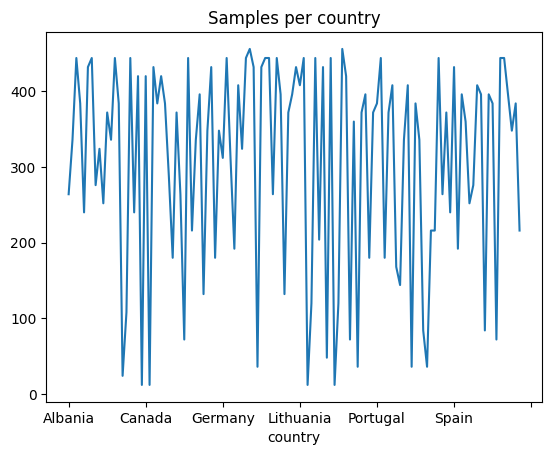

In [ ]:
country_samples_count = df.groupby(['country']).count()
country_samples_count.suicides.plot(title='Samples per country')
mean = country_samples_count.suicides.mean()

In [ ]:
hq_countries = pd.DataFrame(country_samples_count.suicides[lambda x: x > mean])
hq_countries.reset_index(inplace=True)

In [ ]:
quality_examples = pd.merge(df, hq_countries.drop('suicides', axis=1), on=['country'], how='right')

<Axes: title={'center': 'Samples per year'}, xlabel='year'>

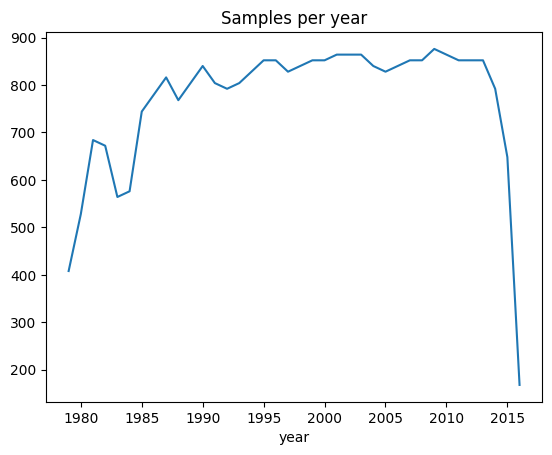

In [ ]:
year_samples_count = quality_examples.groupby(['year']).count()
year_samples_count.suicides.plot(title='Samples per year')

In [ ]:
i = quality_examples[(quality_examples.year == 2015) | (quality_examples.year == 2016)].index
quality_examples.drop(i, inplace=True)
quality_examples.reset_index().drop('index', axis = 1)

,country,year,sex,age,suicides,population,percentage
0,Antigua and Barbuda,1983,female,15-24 years,0.0,7882.0,0.000000
1,Antigua and Barbuda,1983,female,25-34 years,0.0,6341.0,0.000000
2,Antigua and Barbuda,1983,female,35-54 years,0.0,6284.0,0.000000
3,Antigua and Barbuda,1983,female,5-14 years,0.0,8119.0,0.000000
4,Antigua and Barbuda,1983,female,55-74 years,0.0,3729.0,0.000000
...,...,...,...,...,...,...,...
28375,Venezuela (Bolivarian Republic of),2013,male,25-34 years,120.0,2443366.0,0.004911
28376,Venezuela (Bolivarian Republic of),2013,male,35-54 years,165.0,3608605.0,0.004572
28377,Venezuela (Bolivarian Republic of),2013,male,5-14 years,9.0,2939717.0,0.000306
28378,Venezuela (Bolivarian Republic of),2013,male,55-74 years,85.0,1542045.0,0.005512


In [ ]:
quality_examples.describe()

,year,suicides,population,percentage
count,28380.000000,28380.000000,2.838000e+04,28380.000000
mean,1997.525159,264.778259,1.908851e+06,0.014317
std,9.984641,946.906684,3.964423e+06,0.020398
min,1979.000000,0.000000,3.890000e+02,0.000000
25%,1989.000000,4.000000,1.296815e+05,0.001373
50%,1998.000000,32.000000,4.569525e+05,0.007158
75%,2006.000000,148.000000,1.613129e+06,0.018541
max,2014.000000,22338.000000,4.380521e+07,0.219224


In [ ]:
quality_examples.sex.value_counts()

female    14190
male      14190
Name: sex, dtype: int64

In [ ]:
quality_examples.age.value_counts()

15-24 years    4730
25-34 years    4730
35-54 years    4730
5-14 years     4730
55-74 years    4730
75+ years      4730
Name: age, dtype: int64

### Gender

<ipython-input-22-88822a90f05d>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quality_examples.drop(['population','suicides', 'year'],axis=1).groupby(['sex']).sum().plot.bar(ax=percentage_figure, title='Suicide percentage', rot=0)
<ipython-input-22-88822a90f05d>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quality_examples.drop(['population','percentage', 'year'],axis=1).groupby(['sex']).sum().plot.bar(ax=suicide_figure, title='Number of suicides', rot=0)
<ipython-input-22-88822a90f05d>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numer

<Axes: title={'center': 'Population'}, xlabel='sex'>

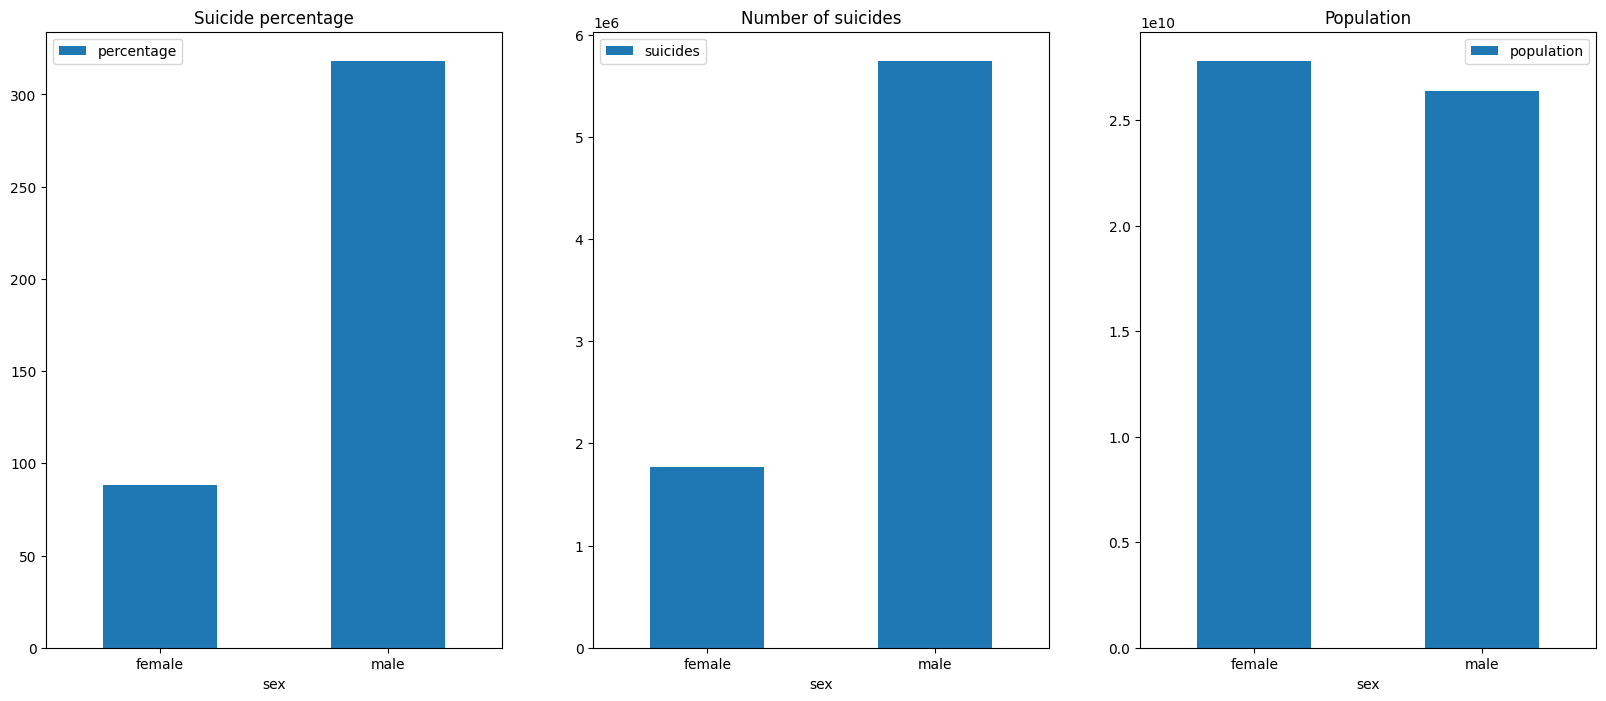

In [ ]:
sex_figure = plt.figure(figsize=(20,8))
percentage_figure = sex_figure.add_subplot(1,3,1)
suicide_figure = sex_figure.add_subplot(1,3,2)
population_figure = sex_figure.add_subplot(1,3,3)

quality_examples.drop(['population','suicides', 'year'],axis=1).groupby(['sex']).sum().plot.bar(ax=percentage_figure, title='Suicide percentage', rot=0)
quality_examples.drop(['population','percentage', 'year'],axis=1).groupby(['sex']).sum().plot.bar(ax=suicide_figure, title='Number of suicides', rot=0)
quality_examples.drop(['percentage','percentage', 'suicides','year'],axis=1).groupby(['sex']).sum().plot.bar(ax=population_figure, title='Population', rot=0)

### Population

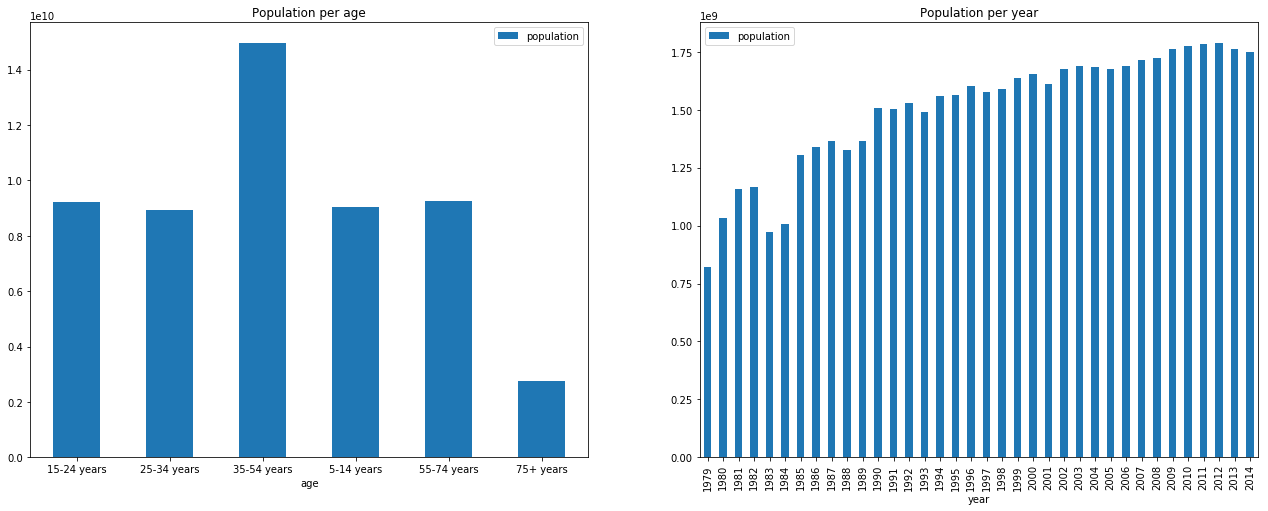

In [ ]:
pop_figure = plt.figure(figsize=(22,8))
age_pop_figure = pop_figure.add_subplot(1,2,1)
year_pop_figure = pop_figure.add_subplot(1,2,2)

quality_examples.drop(['percentage','suicides'],axis=1).groupby(['year']).sum().plot.bar(ax= year_pop_figure, title='Population per year')
quality_examples.drop(['percentage','suicides', 'year'],axis=1).groupby(['age']).sum().plot.bar(ax= age_pop_figure, title='Population per age', rot=0)

Text(0.5,1,'Deviation between number of samples and population size')

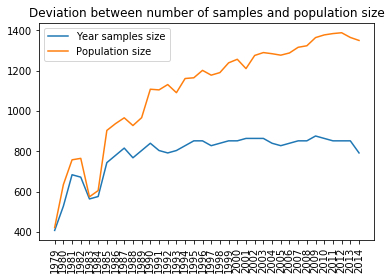

In [ ]:
year_samples_count = quality_examples.groupby('year').count()
pop_size = quality_examples.drop(['percentage','suicides'],axis=1).groupby(['year']).sum()

plt.plot(year_samples_count.population, label='Year samples size')
plt.plot(pop_size/1000000 - 400, label='Population size')
plt.xticks(np.arange(1979,2015), rotation=90)
plt.legend()
plt.title('Deviation between number of samples and population size')

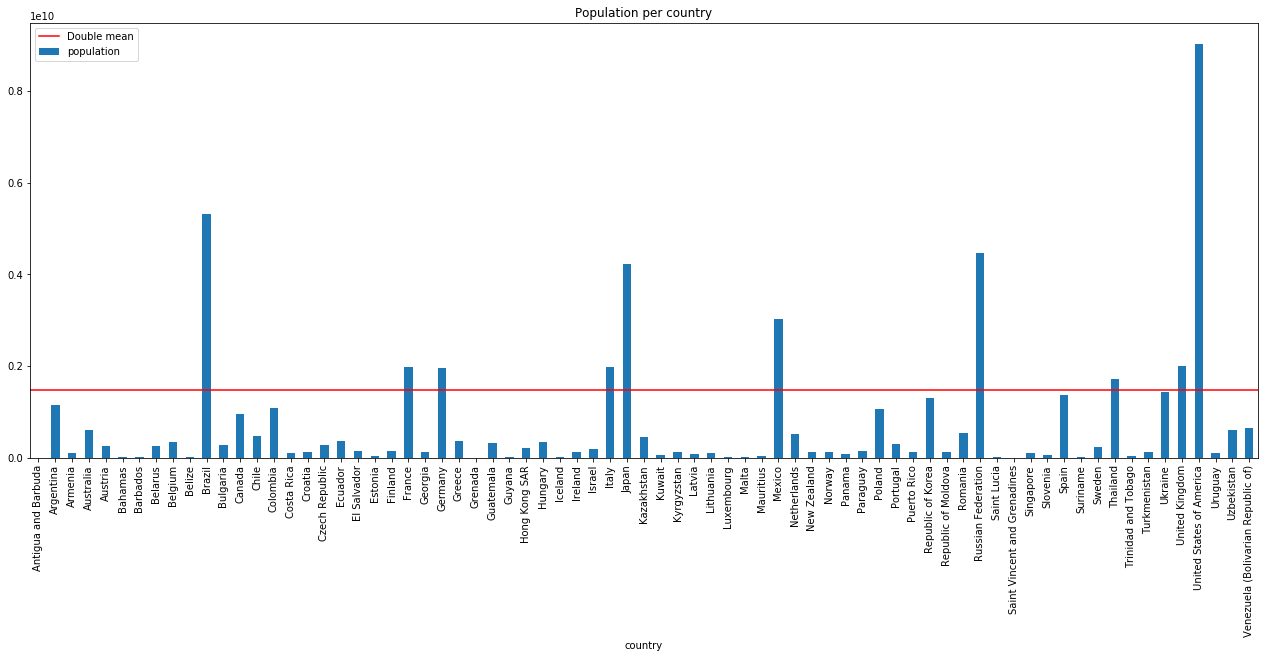

In [ ]:
pop_figure2 = plt.figure(figsize=(22,8))
country_pop_figure = pop_figure2.add_subplot(1,1,1)

quality_examples.drop(['percentage','suicides', 'year'],axis=1).groupby(['country']).sum().plot.bar(ax = country_pop_figure, title='Population per country')

mn = quality_examples.drop(['percentage','suicides', 'year'],axis=1).groupby(['country']).sum().mean()
country_pop_figure.axhline(mn[0]*2,c='red',linestyle='-', label='Double mean')
plt.legend()

### Suicides

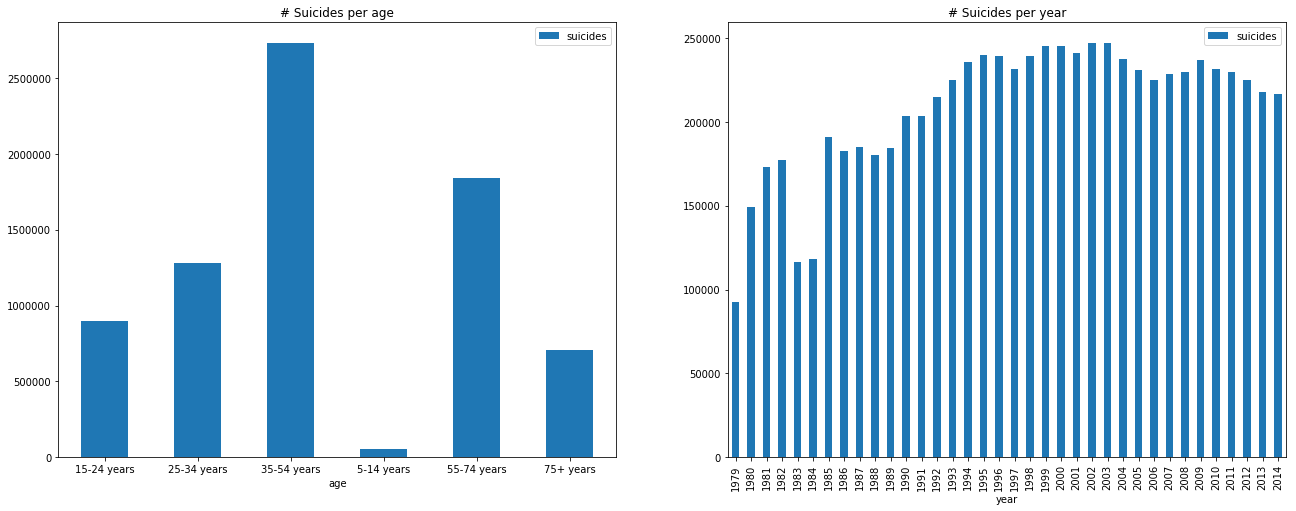

In [ ]:
suicide_figure = plt.figure(figsize=(22,8))
age_suicide_figure = suicide_figure.add_subplot(1,2,1)
year_suicide_figure = suicide_figure.add_subplot(1,2,2)

quality_examples.drop(['percentage','population', 'year'],axis=1).groupby(['age']).sum().plot.bar(ax= age_suicide_figure, title='# Suicides per age', rot=0)
quality_examples.drop(['percentage','population'],axis=1).groupby(['year']).sum().plot.bar(ax= year_suicide_figure, title='# Suicides per year')


Text(0.5,1,'Deviation between number of samples and suicides')

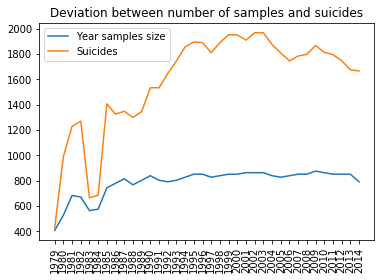

In [ ]:
year_samples_count = quality_examples.groupby('year').count()
suicide = quality_examples.drop(['percentage','population'],axis=1).groupby(['year']).sum()

plt.plot(year_samples_count.population, label='Year samples size')
plt.plot(suicide/100 - 500, label='Suicides')
plt.xticks(np.arange(1979,2015), rotation=90)
plt.legend()
plt.title('Deviation between number of samples and suicides')

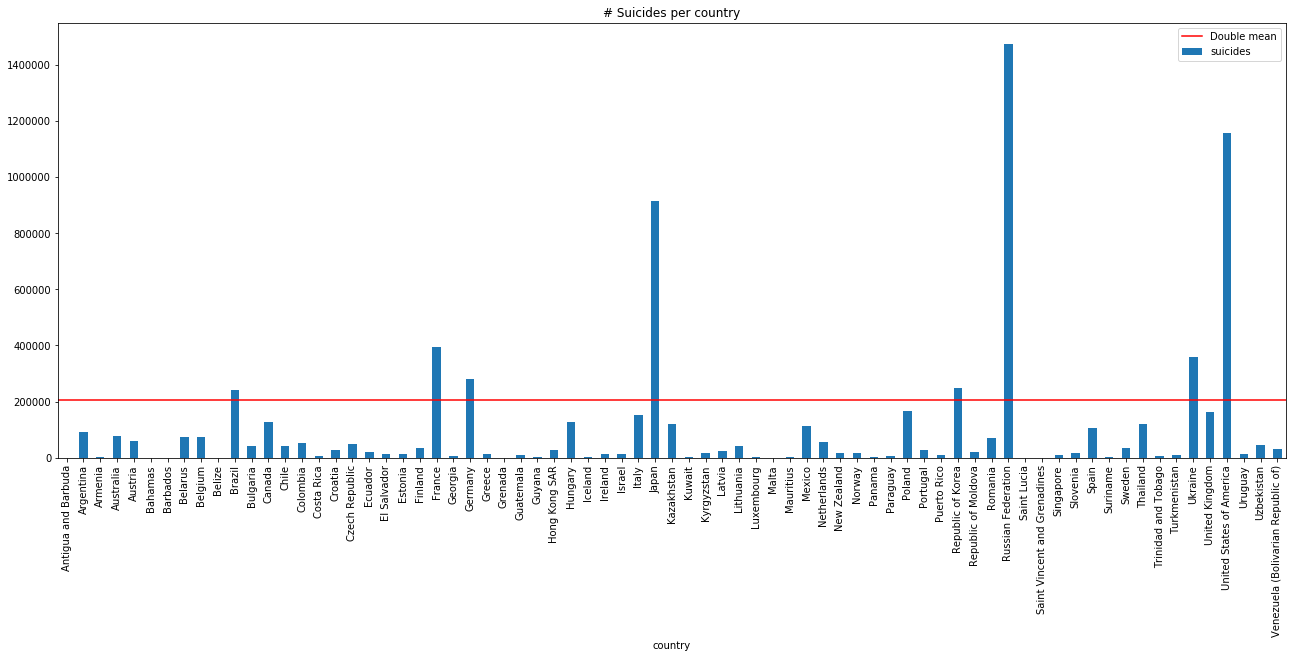

In [ ]:
suicide_figure2 = plt.figure(figsize=(22,8))
country_suicide_figure = suicide_figure2.add_subplot(1,1,1)

quality_examples.drop(['percentage','population', 'year'],axis=1).groupby(['country']).sum().plot.bar(ax = country_suicide_figure, title='# Suicides per country')

mn = quality_examples.drop(['percentage','population', 'year'],axis=1).groupby(['country']).sum().mean()
country_suicide_figure.axhline(mn[0]*2,c='red',linestyle='-',label='Double mean')
plt.legend()

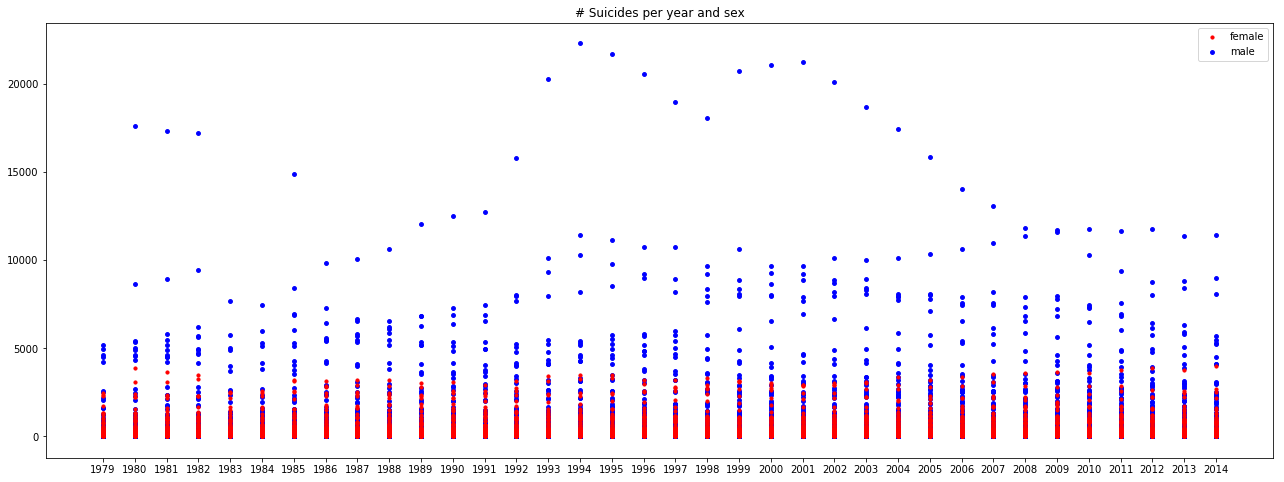

In [ ]:
plt.figure(figsize=(22,8))

male = plt.scatter(quality_examples[quality_examples.sex=='male'].year, quality_examples[quality_examples.sex=='male'].suicides,15, c = ['blue'])
female = plt.scatter(quality_examples[quality_examples.sex=='female'].year, quality_examples[quality_examples.sex=='female'].suicides,10, c = ['red'])

plt.xticks(np.arange(1979,2015))
plt.legend((female,male),('female','male'))
plt.title('# Suicides per year and sex')
plt.show()

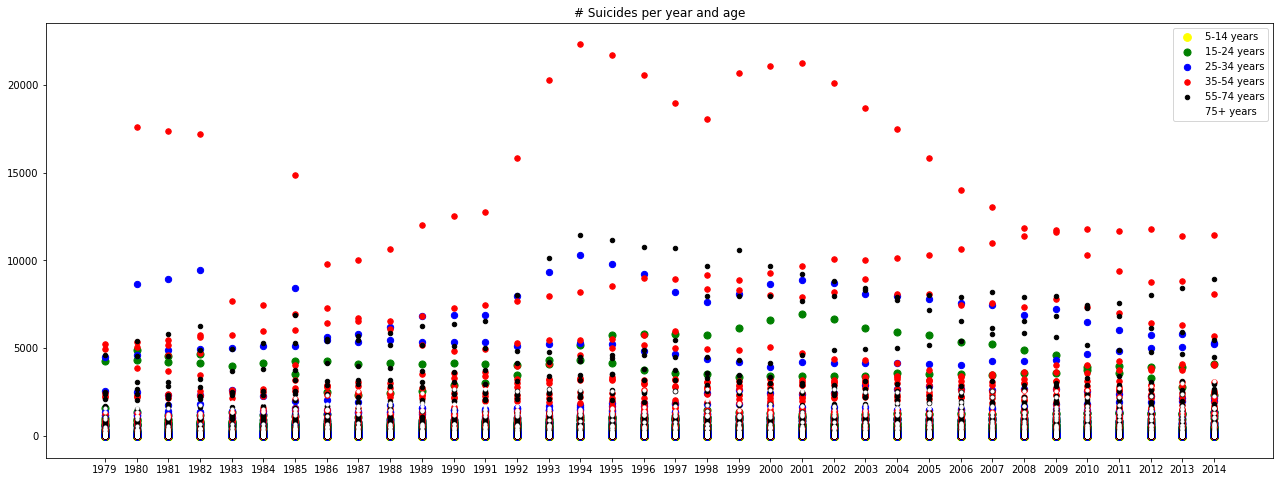

In [ ]:
plt.figure(figsize=(22,8))

a1 = plt.scatter(quality_examples[quality_examples.age=='5-14 years'].year,quality_examples[quality_examples.age=='5-14 years'].suicides,60, c = ['yellow'])
a2 = plt.scatter(quality_examples[quality_examples.age=='15-24 years'].year,quality_examples[quality_examples.age=='15-24 years'].suicides,50, c = ['green'])
a3 = plt.scatter(quality_examples[quality_examples.age=='25-34 years'].year,quality_examples[quality_examples.age=='25-34 years'].suicides,40, c = ['blue'])
a4 = plt.scatter(quality_examples[quality_examples.age=='35-54 years'].year,quality_examples[quality_examples.age=='35-54 years'].suicides,30, c = ['red'])
a5 = plt.scatter(quality_examples[quality_examples.age=='55-74 years'].year,quality_examples[quality_examples.age=='55-74 years'].suicides,20, c = ['black'])
a6 = plt.scatter(quality_examples[quality_examples.age=='75+ years'].year,quality_examples[quality_examples.age=='75+ years'].suicides,10, c = ['white'])

plt.xticks(np.arange(1979,2015))
plt.title('# Suicides per year and age')
plt.legend((a1,a2,a3,a4,a5,a6),('5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'))
plt.show()

### Percentage

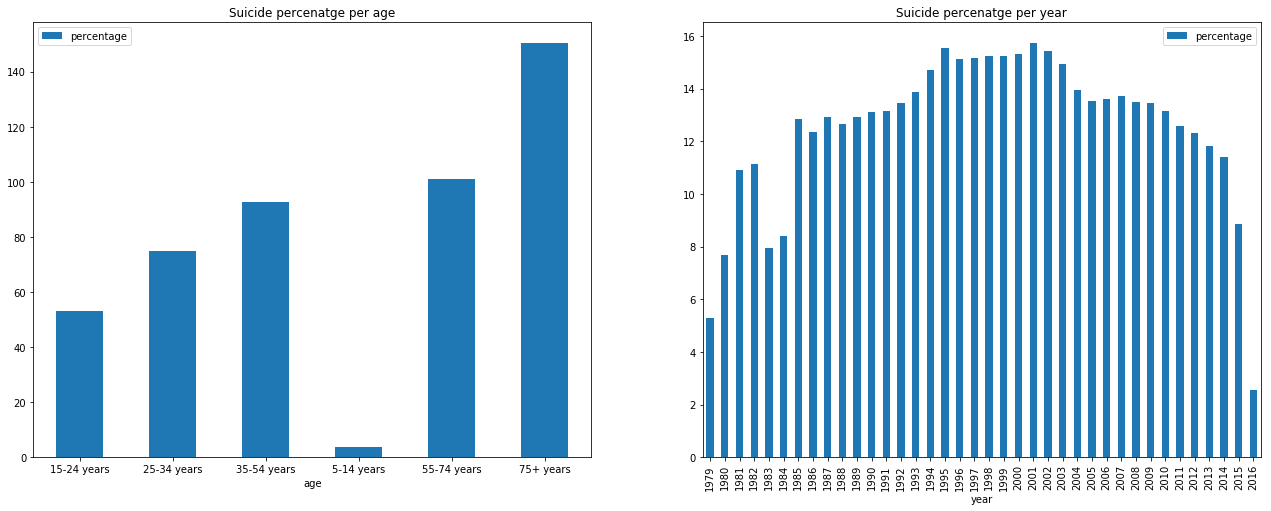

In [ ]:
percentage_figure = plt.figure(figsize=(22,8))
age_percentage_figure = percentage_figure.add_subplot(1,2,1)
year_percentage_figure = percentage_figure.add_subplot(1,2,2)

df.drop(['population','suicides','year'],axis=1).groupby(['age']).sum().plot.bar(ax= age_percentage_figure, title='Suicide percenatge per age',rot=0)
df.drop(['population','suicides'],axis=1).groupby(['year']).sum().plot.bar(ax= year_percentage_figure, title='Suicide percenatge per year')

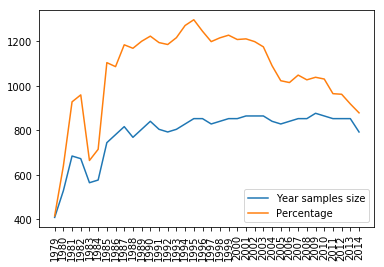

In [ ]:
year_samples_count = quality_examples.groupby('year').count()
percentage = quality_examples.drop(['suicides','population'],axis=1).groupby(['year']).sum()

plt.plot(year_samples_count.population, label='Year samples size')
plt.plot(percentage*100 - 70, label='Percentage')
plt.xticks(np.arange(1979,2015), rotation=90)
plt.legend()

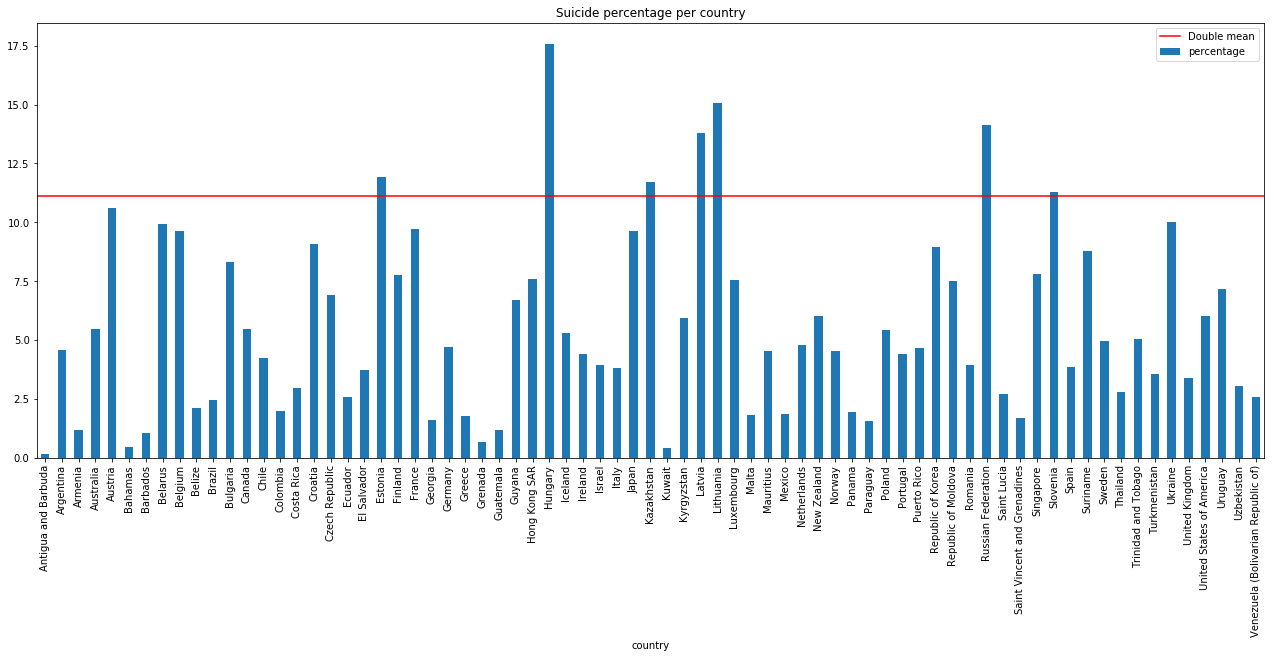

In [ ]:
fig = plt.figure(figsize=(22,8))
axes = fig.add_subplot(1,1,1)

quality_examples.drop(['population','suicides', 'year'],axis=1).groupby(['country']).sum().plot.bar(ax=axes, title='Suicide percentage per country')
mn = quality_examples.drop( ['population','suicides', 'year'],axis=1 ).groupby(['country']).sum().mean()

axes.axhline(mn[0]*2,c='red',linestyle='-', label='Double mean')
plt.legend()

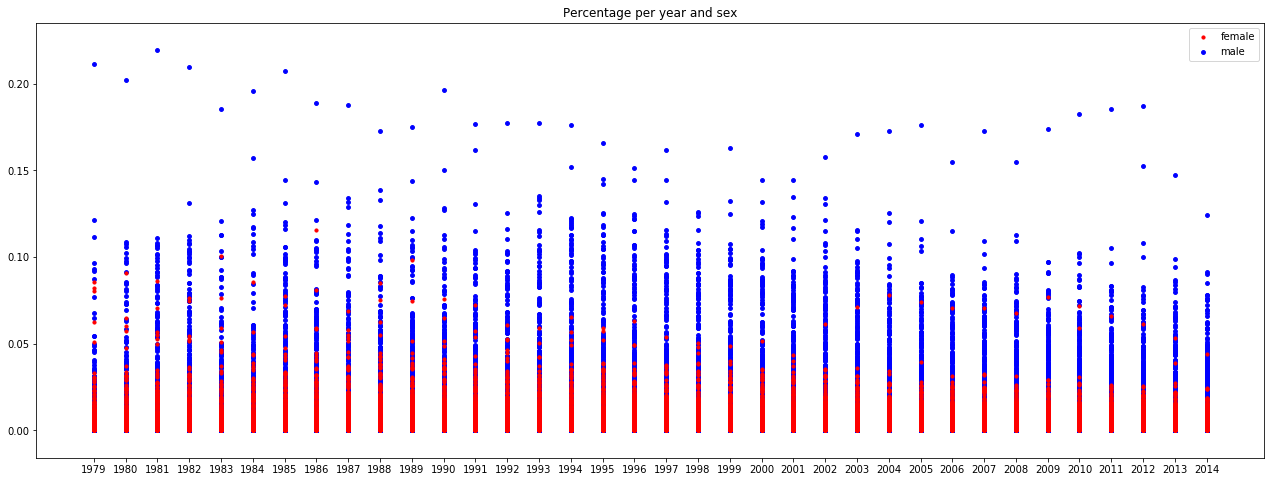

In [ ]:
plt.figure(figsize=(22,8))

male = plt.scatter(quality_examples[quality_examples.sex=='male'].year, quality_examples[quality_examples.sex=='male'].percentage,15, c = ['blue'])
female = plt.scatter(quality_examples[quality_examples.sex=='female'].year, quality_examples[quality_examples.sex=='female'].percentage,10, c = ['red'])

plt.xticks(np.arange(1979,2015))
plt.legend((female,male),('female','male'))
plt.title('Percentage per year and sex')
plt.show()

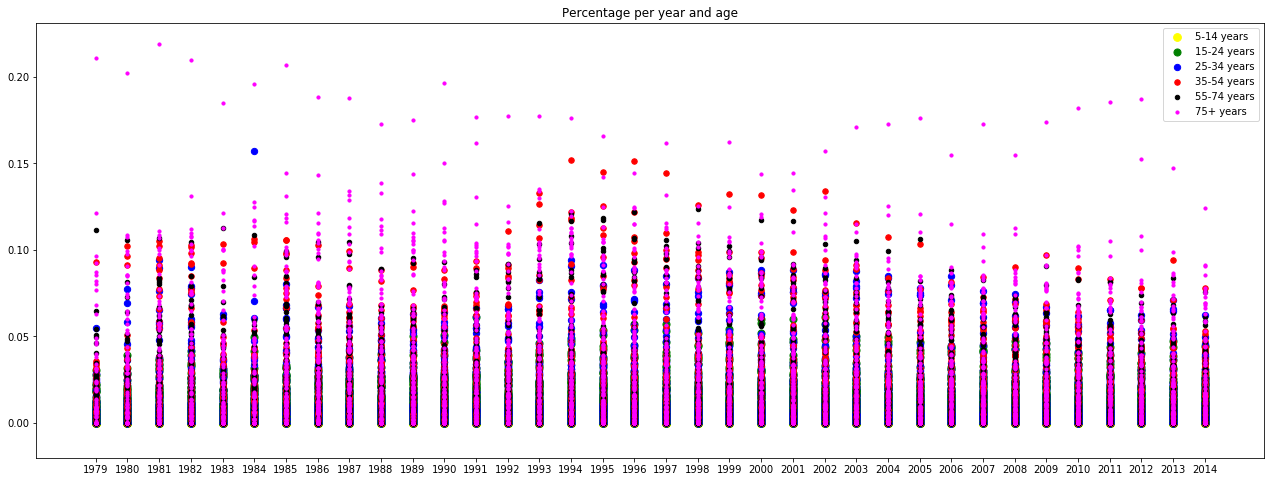

In [ ]:
plt.figure(figsize=(22,8))

a1 = plt.scatter(quality_examples[quality_examples.age=='5-14 years'].year,quality_examples[quality_examples.age=='5-14 years'].percentage,60, c = ['yellow'])
a2 = plt.scatter(quality_examples[quality_examples.age=='15-24 years'].year,quality_examples[quality_examples.age=='15-24 years'].percentage,50, c = ['green'])
a3 = plt.scatter(quality_examples[quality_examples.age=='25-34 years'].year,quality_examples[quality_examples.age=='25-34 years'].percentage,40, c = ['blue'])
a4 = plt.scatter(quality_examples[quality_examples.age=='35-54 years'].year,quality_examples[quality_examples.age=='35-54 years'].percentage,30, c = ['red'])
a5 = plt.scatter(quality_examples[quality_examples.age=='55-74 years'].year,quality_examples[quality_examples.age=='55-74 years'].percentage,20, c = ['black'])
a6 = plt.scatter(quality_examples[quality_examples.age=='75+ years'].year,quality_examples[quality_examples.age=='75+ years'].percentage,10, c = ['magenta'])

plt.xticks(np.arange(1979,2015))
plt.title('Percentage per year and age')
plt.legend((a1,a2,a3,a4,a5,a6),('5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'))
plt.show()

### GDP

In [ ]:


uploaded = files.upload()
df2 = pd.read_csv('gdp.csv')
df2.rename(columns={'gdp_per_capita ($)':'per_capita'}, inplace=True)

In [ ]:
gdp = pd.merge(df2, hq_countries.drop('suicides', axis=1), on=['country'], how='right')

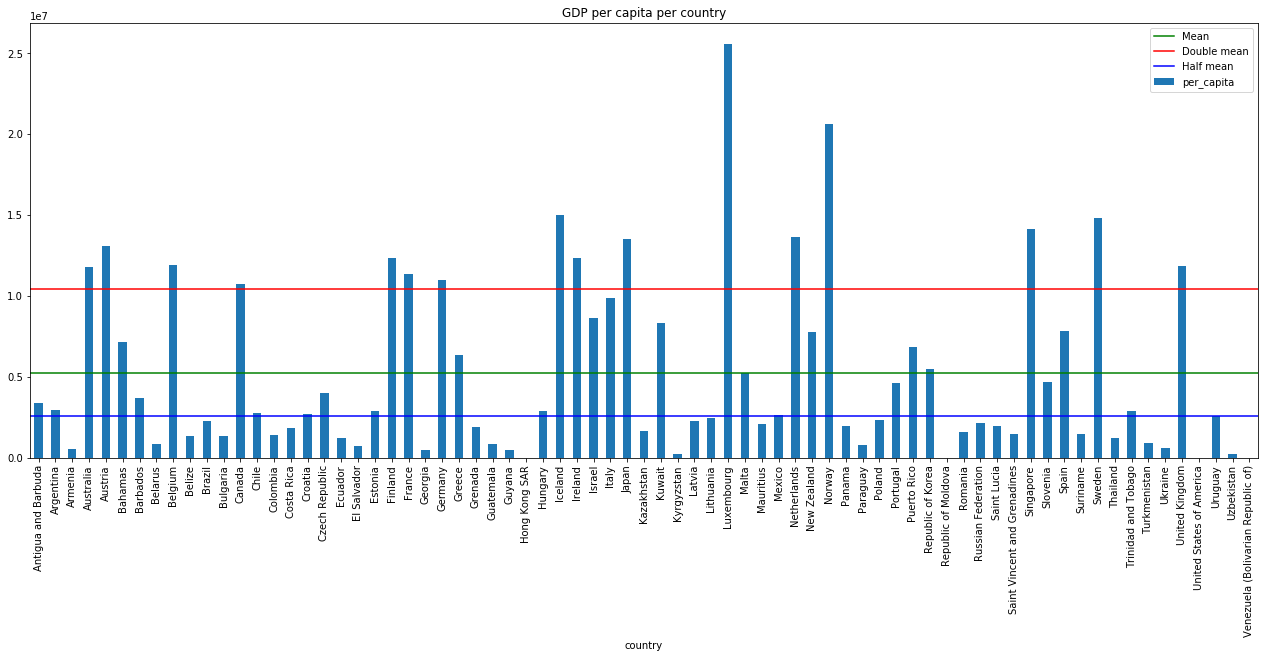

In [ ]:
gdp_figure = plt.figure(figsize=(22,8))
country_gdp_figure = gdp_figure.add_subplot(1,1,1)

per_capita = gdp.drop(['suicides_no','suicides/100k pop','HDI for year',' gdp_for_year ($) ','population', 'year'],axis=1).groupby(['country']).sum()
per_capita.plot.bar(ax = country_gdp_figure, title='GDP per capita per country')

mn = per_capita.mean()
country_gdp_figure.axhline(mn[0],c='green',linestyle='-', label='Mean')
country_gdp_figure.axhline(mn[0]*2,c='red',linestyle='-', label='Double mean')
country_gdp_figure.axhline(mn[0]*0.5,c='blue',linestyle='-', label='Half mean')

plt.legend()

In [ ]:
percentage = quality_examples.drop(['population','suicides', 'year','sex'],axis=1).groupby(['country']).sum()
percentage.reset_index()

,country,percentage
0,Antigua and Barbuda,0.163522
1,Argentina,4.563381
2,Armenia,1.187250
3,Australia,5.471258
4,Austria,10.621918
5,Bahamas,0.439598
6,Barbados,1.031649
7,Belarus,9.905211
8,Belgium,9.639795
9,Belize,2.121662


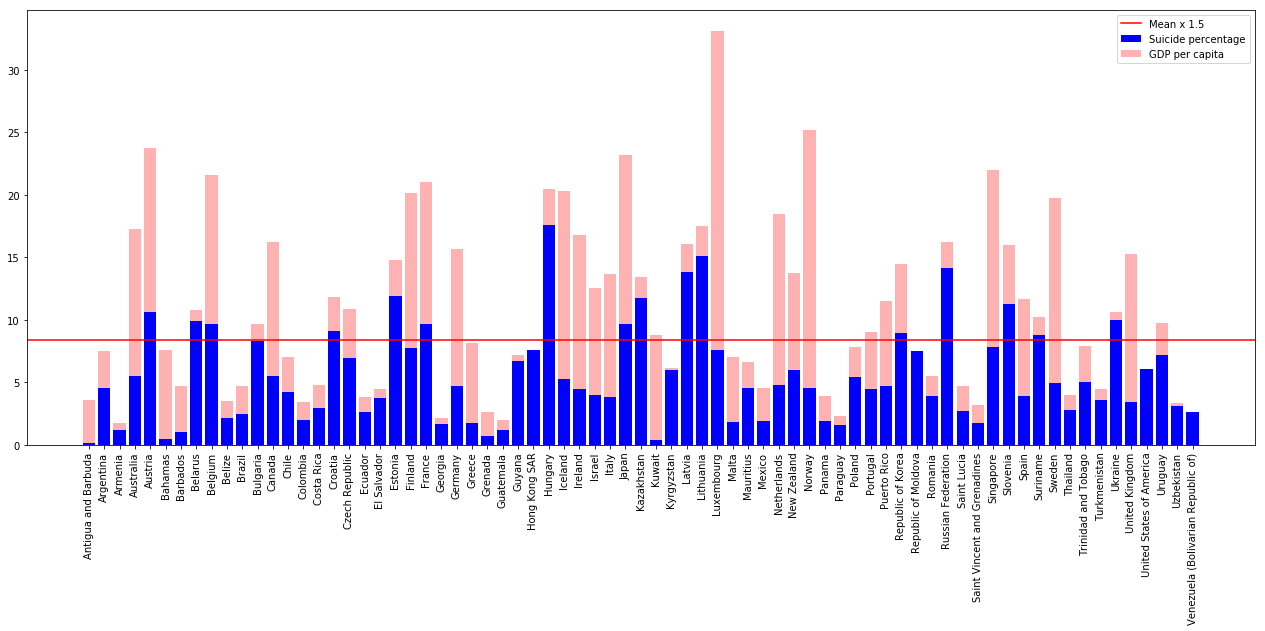

In [ ]:
index = hq_countries.drop('suicides', axis=1).country

plt.figure(figsize=(22,8))
plt.bar(index, percentage.percentage, color='blue', label='Suicide percentage')
plt.bar(index, per_capita.per_capita/1000000, color='red', alpha=0.3, bottom = percentage.percentage, label='GDP per capita')
plt.xticks(rotation=90)

mn = quality_examples.drop( ['population','suicides', 'year'],axis=1 ).groupby(['country']).sum().mean()
plt.axhline(mn[0]*1.5,c='red',linestyle='-', label='Mean x 1.5')

plt.legend()
plt.show()